In [34]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import csv

In [35]:
name="defunc_edad.csv"

In [36]:
def_age=pd.read_csv(name,sep=";")
def_age

,municipio_codigo,municipio_nombre,distrito_codigo,distrito_nombre,barrio_codigo,barrio_nombre,sexo,rango_edad,numero_defunciones
0,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,De 0 a 4 años,0
1,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,De 5 a 9 años,0
2,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,De 10 a 14 años,0
3,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,De 15 a 19 años,0
4,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,De 20 a 24 años,1
...,...,...,...,...,...,...,...,...,...
5413,79,Madrid,NaN,No consta Distrito,NaN,No consta Barrio,Mujer,De 80 a 84 años,123
5414,79,Madrid,NaN,No consta Distrito,NaN,No consta Barrio,Mujer,De 85 a 89 años,176
5415,79,Madrid,NaN,No consta Distrito,NaN,No consta Barrio,Mujer,De 90 a 94 años,198
5416,79,Madrid,NaN,No consta Distrito,NaN,No consta Barrio,Mujer,De 95 a 99 años,85


In [37]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ ESTADISTICA DEFUNCIONES MADRID CAPITAL 2019 RANGO EDAD /SEXO $$$$$$$$$$$$$$$$$$$$$$$$$$

In [38]:

def_age['rango_edad'] = def_age['rango_edad'].replace(["De 5 a 9 años"],"De 05 a 09 años")

In [39]:
def_age.loc[:,["sexo","rango_edad","numero_defunciones"]]

,sexo,rango_edad,numero_defunciones
0,Hombre,De 0 a 4 años,0
1,Hombre,De 05 a 09 años,0
2,Hombre,De 10 a 14 años,0
3,Hombre,De 15 a 19 años,0
4,Hombre,De 20 a 24 años,1
...,...,...,...
5413,Mujer,De 80 a 84 años,123
5414,Mujer,De 85 a 89 años,176
5415,Mujer,De 90 a 94 años,198
5416,Mujer,De 95 a 99 años,85


In [40]:
def_age1=def_age.pivot_table('numero_defunciones', index='rango_edad',columns='sexo',aggfunc=np.sum)

In [41]:
def_age.index=pd.to_datetime(def_age.index)

In [42]:
def_age1

sexo,Hombre,Mujer
rango_edad,,
De 0 a 4 años,56,44
De 05 a 09 años,7,4
De 10 a 14 años,11,5
De 15 a 19 años,15,10
De 20 a 24 años,21,17
De 25 a 29 años,27,20
De 30 a 34 años,39,23
De 35 a 39 años,63,40
De 40 a 44 años,124,80


In [43]:
def_age1.sum()

sexo
Hombre    13326
Mujer     15268
dtype: int64

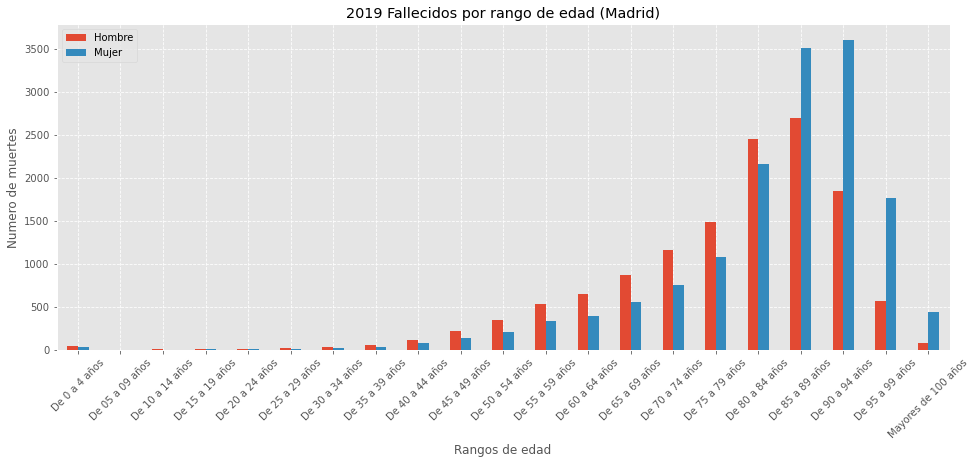

In [83]:
def_age1.plot(kind="bar",figsize=(16,6))
plt.legend()
plt.xlabel("Rangos de edad")
plt.ylabel("Numero de muertes")
plt.title("2019 Fallecidos por rango de edad (Madrid)")
plt.grid(linestyle="dashed")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [151]:
def_age2=def_age1.sum()
def_age2

sexo
Hombre    13326
Mujer     15268
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

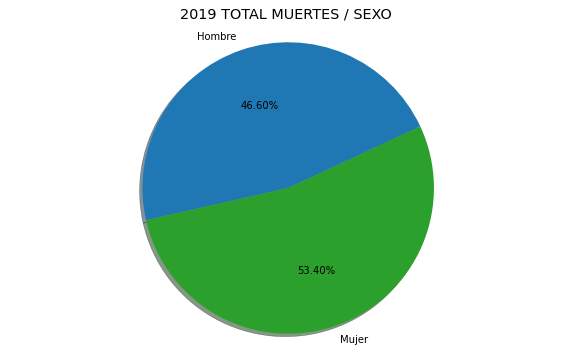

In [154]:
from matplotlib import pyplot
plt.figure(figsize=(10,6))
sexo=("Hombre","Mujer")
porcentaje_sexo=def_age2
colores=["#1f77b4","#2ca02c"]
desfase=(0.0,0.0)
pyplot.pie(porcentaje_sexo,labels=sexo,colors=colores,autopct="%1.2f%%",shadow=True,startangle=25,explode=desfase)
pyplot.axis("equal")
pyplot.title("2019 TOTAL MUERTES / SEXO")
pyplot.show

In [45]:
name2="defunc_nac.csv"

In [46]:
def_nac=pd.read_csv(name2,sep=";")
def_nac

,municipio_codigo,municipio_nombre,distrito_codigo,distrito_nombre,barrio_codigo,barrio_nombre,sexo,nacionalidad,numero_defunciones
0,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,África,1
1,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,América Central y del Caribe,1
2,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,América del Norte,0
3,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,América del Sur,1
4,79,Madrid,79601.0,Centro,796011.0,Palacio,Hombre,Apátridas,0
...,...,...,...,...,...,...,...,...,...
2833,79,Madrid,NaN,No consta distrito,NaN,No consta barrio,Mujer,No consta,2
2834,79,Madrid,NaN,No consta distrito,NaN,No consta barrio,Mujer,Oceanía,0
2835,79,Madrid,NaN,No consta distrito,NaN,No consta barrio,Mujer,Otros países de América,0
2836,79,Madrid,NaN,No consta distrito,NaN,No consta barrio,Mujer,Otros países de Europa,0


In [47]:
def_nac.loc[:,["sexo","nacionalidad","numero_defunciones"]]

,sexo,nacionalidad,numero_defunciones
0,Hombre,África,1
1,Hombre,América Central y del Caribe,1
2,Hombre,América del Norte,0
3,Hombre,América del Sur,1
4,Hombre,Apátridas,0
...,...,...,...
2833,Mujer,No consta,2
2834,Mujer,Oceanía,0
2835,Mujer,Otros países de América,0
2836,Mujer,Otros países de Europa,0


In [87]:
def_nac1=def_nac.pivot_table('numero_defunciones', index='nacionalidad',columns='sexo',aggfunc=np.sum)
def_nac1

sexo,Hombre,Mujer
nacionalidad,,
América Central y del Caribe,17,22
América del Norte,9,16
América del Sur,87,86
Apátridas,0,0
Asia,28,27
No consta,6,3
Oceanía,0,0
Otros países de América,0,0
Otros países de Europa,20,6


In [95]:
def_nac1=def_nac1.loc[~(def_nac1==0).all(axis=1)]
def_nac1

sexo,Hombre,Mujer
nacionalidad,,
América Central y del Caribe,17,22
América del Norte,9,16
América del Sur,87,86
Asia,28,27
No consta,6,3
Otros países de Europa,20,6
Unión Europea,13118,15094
África,41,14


In [96]:
def_nac1.sum()

sexo
Hombre    13326
Mujer     15268
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

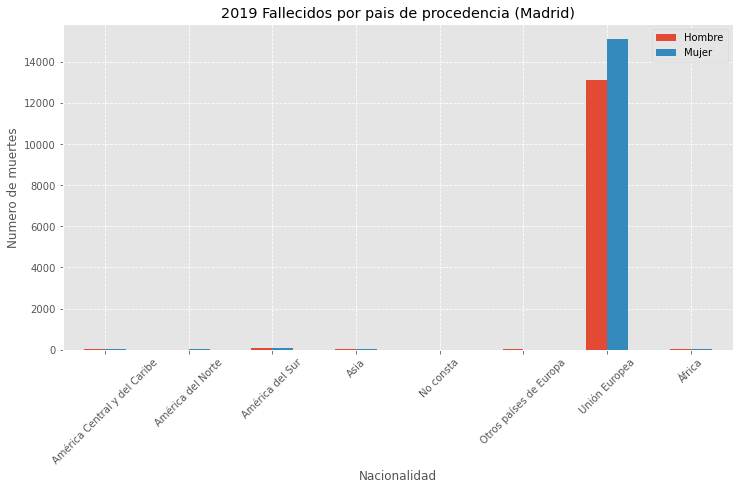

In [98]:

def_nac1.plot(kind="bar",figsize=(12,6))
plt.legend()
plt.xlabel("Nacionalidad")
plt.ylabel("Numero de muertes")
plt.title("2019 Fallecidos por pais de procedencia (Madrid)")
plt.grid(linestyle="dashed")
plt.xticks(rotation=45)
plt.show
